<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Residuals Analysis

*Author: Alexander Del Toro Barba*

**What are residuals?**

For most (time series) models, the residuals are difference between observation and its corresponding estimated (fitted) value:

$e_{t} = y_{t} - \hat{y}_{t}$

**Why is it important to analyze residuals?**

Residuals are useful in checking whether a model has adequately captured the information in the data. In a good model the residuals are stationary. However one can classify the stationarity criteria in two distinct groups for residual analysis:

A good forecasting method will yield residuals with the following properties:

1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.

2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

Any forecasting method that does not satisfy these properties can be improved. However, that does not mean that forecasting methods that satisfy these properties cannot be improved. It is possible to have several different forecasting methods for the same data set, all of which satisfy these properties. Checking these properties is important in order to see whether a method is using all of the available information, but it is not a good way to select a forecasting method.

If either of these properties is not satisfied, then the forecasting method can be modified to give better forecasts. Adjusting for bias is easy: if the residuals have mean m, then simply add m to all forecasts and the bias problem is solved. Fixing the correlation problem is harder, and we will not address it until Chapter 9.

In addition to these essential properties, it is useful (but not necessary) for the residuals to also have the following two properties.

3. The residuals have constant variance.

4. The residuals are normally distributed.

These two properties make the calculation of prediction intervals easier (see Section 3.5 for an example). However, a forecasting method that does not satisfy these properties cannot necessarily be improved. Sometimes applying a Box-Cox transformation may assist with these properties, but otherwise there is usually little that you can do to ensure that your residuals have constant variance and a normal distribution. Instead, an alternative approach to obtaining prediction intervals is necessary. Again, we will not address how to do this until later in the book.

https://otexts.com/fpp2/residuals.html
https://otexts.com/fpp2/prediction-intervals.html

# Import Libraries

In [0]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Time Series Model

## Import & Explore Data

In [0]:
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/google.csv'
timeseries = pd.read_csv(url)

timeseries = timeseries.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
timeseries = timeseries.set_index('Date')

In [0]:
timeseries.head()

,Close
Date,
2010-02-01,265.514771
2010-02-02,264.568329
2010-02-03,269.400208
2010-02-04,262.406433
2010-02-05,264.653015


In [0]:
timeseries.describe()

,Close
count,2516.000000
mean,652.587282
std,331.360307
min,217.220810
25%,322.143769
50%,567.298034
75%,937.145019
max,1486.650024


Text(0.5, 0, 'Time step')

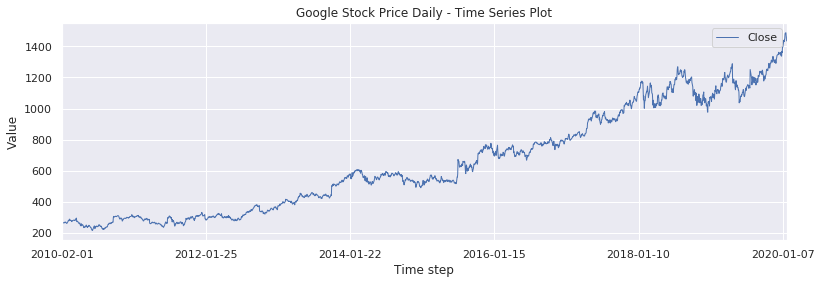

In [0]:
df = timeseries
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='Google Stock Price Daily - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')

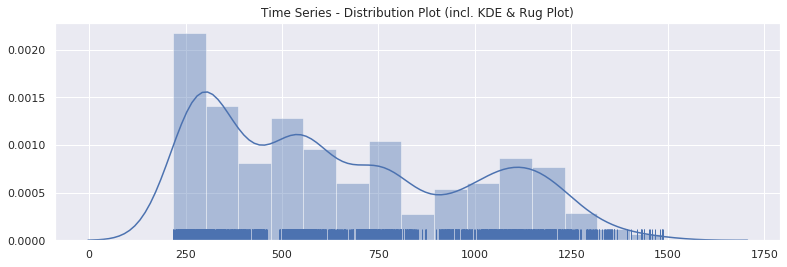

In [0]:
df = timeseries
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Time Series - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

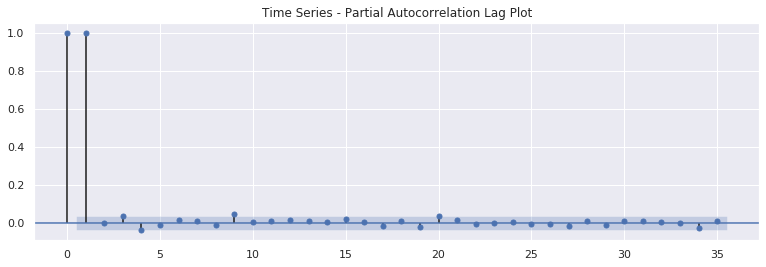

In [0]:
plot_pacf(timeseries)
plt.title('Time Series - Partial Autocorrelation Lag Plot')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


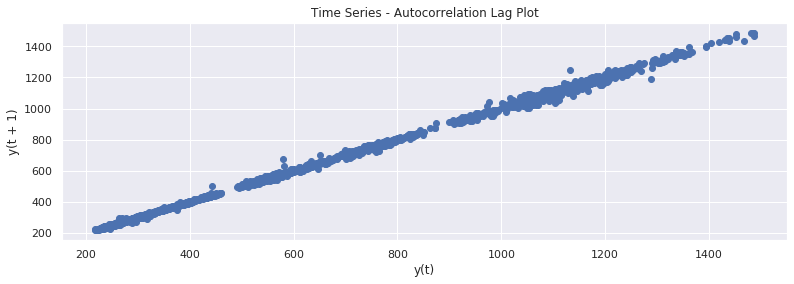

In [0]:
lag_plot(timeseries)
plt.title('Time Series - Autocorrelation Lag Plot')
plt.show()

One can predict next day price by todays price in a good amount. Rest maybe (Gaussian?) noise -> needs to be modeled and checked.

## Model Training

Model Source: https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# Create lagged dataset
values = DataFrame(timeseries.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

          t-1         t+1
0         NaN  265.514771
1  265.514771  264.568329
2  264.568329  269.400208
3  269.400208  262.406433
4  262.406433  264.653015


In [0]:
# Train and Test Set
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [0]:
# persistence model
def model_persistence(x):
	return x

In [0]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 238.637


In [0]:
# Define residuals
residuals = (test_y - predictions)

# Convert from numpy.ndarray into pandas.DataFrame
residuals = pd.DataFrame(residuals,
                         columns=['value'])

# Residuals Analysis

## Summary

In [0]:
residuals.head()

,value
0,2.679993
1,8.619995
2,0.269959
3,-5.029969
4,-15.660034


In [32]:
residuals.describe()

,value
count,856.000000
mean,0.805900
std,15.435872
min,-99.099976
25%,-5.704956
50%,0.945038
75%,8.652482
max,118.290039


Text(0.5, 0, 'Time step')

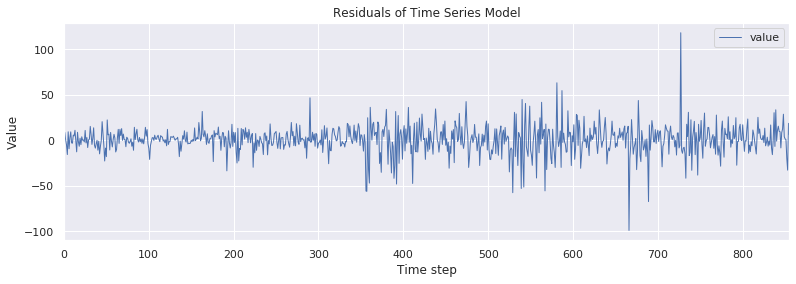

In [31]:
df = residuals
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='Residuals of Time Series Model')
plt.ylabel('Value')
plt.xlabel('Time step')

## Distribution Tests

**Distribution Plot**

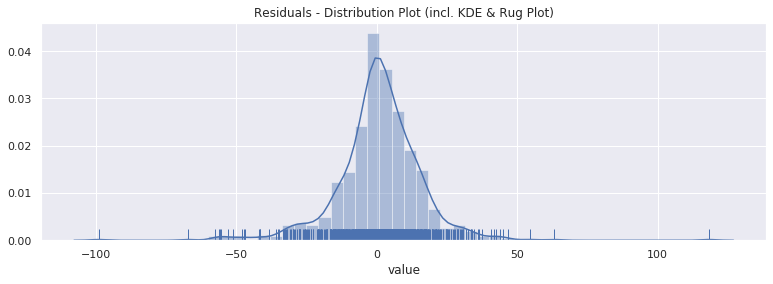

In [0]:
df = residuals.value
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Residuals - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**Quantile Quantile Plot**

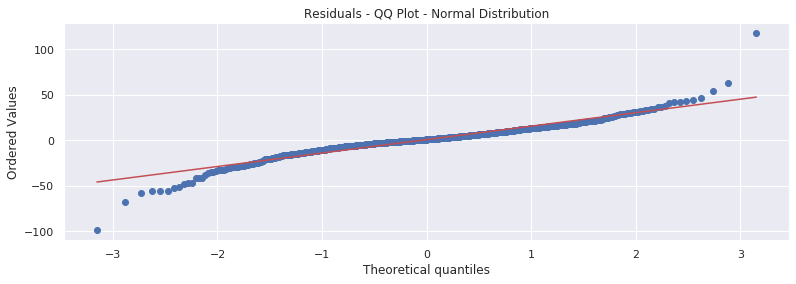

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
stats.probplot(residuals.value, dist="norm", plot=plt)
plt.title('Residuals - QQ Plot - Normal Distribution')
plt.show()

**Box Plot**

Text(0.5, 1.0, 'Residuals - Boxplot')

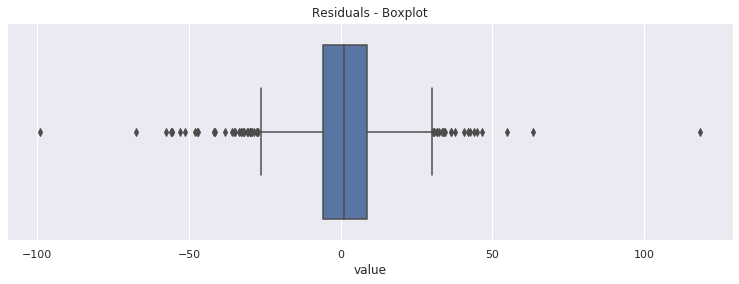

In [0]:
# Box Plot
sns.set(rc={'figure.figsize':(13, 4)})
sns.boxplot(residuals.value).set_title('Residuals - Boxplot')

**BDS Independence Test**

In [35]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(residuals.value, max_dim=2, epsilon=None, distance=1.5)

(array(3.47263495), array(0.00051538))

**Anderson-Darling Test**

In [0]:
# Anderson-Darling Test for Normal Distribution
stats.anderson(residuals.value)

AndersonResult(statistic=13.297006128650992, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**Jarque-Bera Test**

In [0]:
# Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution
# Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)
stats.jarque_bera(residuals.value)

(2024.564169892181, 0.0)

**Kolmogorov-Smirnov Test**

In [0]:
# Kolmogorov-Smirnov Test
stats.kstest(residuals.value, 'norm')

KstestResult(statistic=0.43962978621936777, pvalue=3.940961727241644e-151)


---
## Stationary Tests



**Augmented Dickey Fuller Test**

In [0]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# Test for no constant, no trend. Reject H0 if p-value of less than 5%.
statsmodels.tsa.stattools.adfuller(residuals.value, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-10.644122121373616,
 4.0301069141070444e-19,
 10,
 845,
 {'1%': -2.5683909968138368,
  '10%': -1.6165094394221937,
  '5%': -1.9413225307933255},
 6934.770505985956)

**KPSS - Trend Stationary Test**

In [0]:
# KPSS - Trend Stationary Test
# H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root). Reject H0 if p-value of less than 5% 
statsmodels.tsa.stattools.kpss(residuals.value, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.04993289213969271,
 0.1,
 5,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

**KPSS - Level Stationary Test**

In [0]:
# KPSS - Level Stationary Test
# H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root). Reject H0 if p-value of less than 5%
statsmodels.tsa.stattools.kpss(residuals.value, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.05802612414321132,
 0.1,
 4,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

---
## Autocorrelation Tests

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


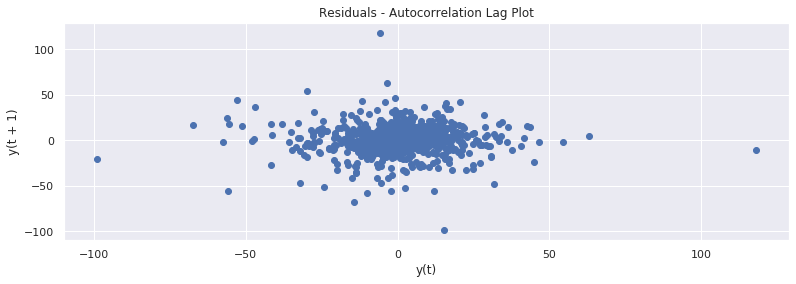

In [0]:
lag_plot(residuals.value)
sns.set(rc={'figure.figsize':(13, 4)})
plt.title('Residuals - Autocorrelation Lag Plot')
plt.show()

**Autocorrelation Plot**

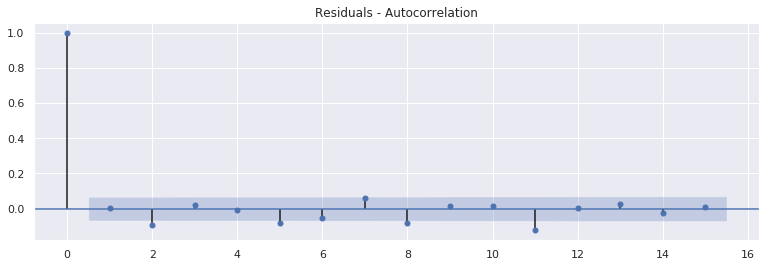

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(residuals.value.squeeze(), lags=15)
plt.title('Residuals - Autocorrelation')
plt.show()

**Partial Autocorrelation Plot**

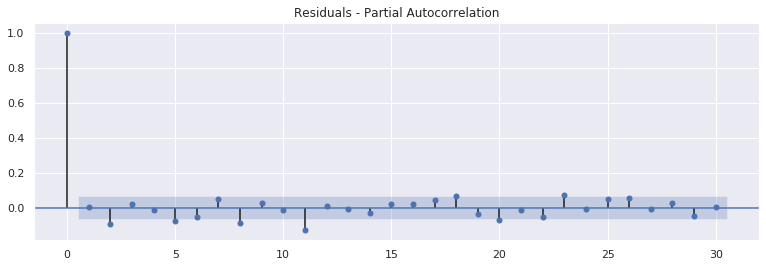

In [0]:
# Partial Autocorrelation Plot
plot_pacf(residuals.value)
sns.set(rc={'figure.figsize':(13, 4)})
plt.title('Residuals - Partial Autocorrelation')
plt.show()

**Durbin-Watson Test**

In [0]:
# Durbin-Watson test to assess autocorrelation
# The null hypothesis of the test is that there is no serial correlation
# This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.
statsmodels.stats.stattools.durbin_watson(residuals.value, axis=0)

1.9873377632884202

**Ljung-Box Q Statistic**

In [0]:
# Ljung-Box Q Statistic
# Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
# examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.
# statsmodels.tsa.stattools.q_stat(residuals.value, nobs=856, type='ljungbox')

**Breusch–Godfrey Test**

In [0]:
# Breusch–Godfrey Test